This script takes images and corresponding segmentation mask images produced by MATLAB scrpits "dicom_processing_a.m" and "save_training_data.m" and turns them into a serialized tfrecords file.

In [1]:
from os import listdir
from os.path import isfile, join
import IPython.display as display
import tensorflow as tf

In [2]:
# image and seg_mask folders
image_path = './image/'
seg_mask_path = './seg_mask/'

# get list of images and seg_masks
# note: assume these are in the same order!
imageFileNames = [f for f in listdir(image_path) if isfile(join(image_path, f))]
seg_maskFileNames = [f for f in listdir(seg_mask_path) if isfile(join(seg_mask_path, f))]

# make two copies of the same zipped iterator, one to view now and one ot operate on
# alternatively could tee() one of them (itertools package), but that isn't great because
# iterators should stay close together to avoid using significant memory
allFiles = zip(imageFileNames,seg_maskFileNames)
viewFiles = zip(imageFileNames,seg_maskFileNames)

print('Length of image file list: ', len(imageFileNames))
print('Length of seg_mask file list: ', len(seg_maskFileNames))
#sum( 1 for ex in allFiles) # 364

Length of image file list:  364
Length of seg_mask file list:  364


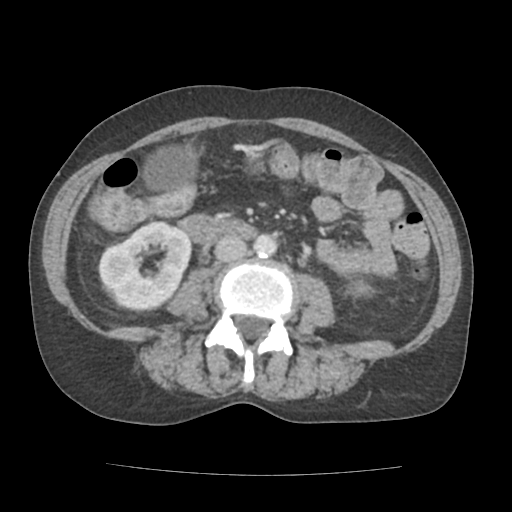

In [3]:
# try loading and displaying an image
# using care not to increment the actual allFiles iterator
thisPair = next(viewFiles)
display.display(display.Image(filename=join(image_path,thisPair[0]) ))

In [4]:
# Following Kaggle: https://www.kaggle.com/gauravchopracg/understanding-tfrecord-format
# this is directly from the Kaggle notebook
# which takes it from TF docs: https://www.tensorflow.org/tutorials/load_data/tfrecord
def _bytes_feature(value):
  """Returns a bytes_list from a string / byte."""
  if isinstance(value, type(tf.constant(0))):
    value = value.numpy() # BytesList won't unpack a string from an EagerTensor.
  return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))

# Create a function to apply entire process to each element of dataset.
# process the two images into 'tf.Example' messages.
def image_example(image_string, seg_mask_string):
  """
  Creates a tf.Example message ready to be written to a file.
  """
  # Create a dictionary mapping the feature name to the tf.Example-compatible
  # data type.
  # COULD ALSO ADD HEIGHT, WIDTH, DEPTH HERE... SEE: https://www.tensorflow.org/tutorials/load_data/tfrecord
  image_feature_description = {
      "image": _bytes_feature(image_string),
      "seg_mask": _bytes_feature(seg_mask_string),    # this had been "class" -> not sure if OK to rename?
      }
  #image_feature_description['image'] = image_string
  #image_feature_description['seg_mask'] = seg_mask_string  
  # Create a Features message using tf.train.Example.
  return tf.train.Example(features=tf.train.Features(feature=image_feature_description))

#sum( 1 for ex in allFiles) # 364

In [5]:
# define a filename to store preprocessed image data:
recordCounter = 0
recordFileName = 'ralpn_a.tfrecords'
with tf.io.TFRecordWriter(recordFileName) as writer:
  for imageFileName, seg_maskFileName in allFiles:
    #imageFileName = example[0]
    #seg_maskFileName = example[1]
    #image_file = tf.image.decode_png(open(join(image_path, imageFileName), 'rb').read())
    #seg_mask_file = tf.image.decode_png(open(join(seg_mask_path, seg_maskFileName), 'rb').read())
    #seg_mask_string = tf.image.decode_png(join(seg_mask_path, seg_maskFileName))    
    image_string = open(join(image_path, imageFileName), 'rb').read()
    seg_mask_string = open(join(seg_mask_path, seg_maskFileName), 'rb').read()
    tf_example = image_example(image_string, seg_mask_string)
    writer.write(tf_example.SerializeToString())
    recordCounter += 1

print('Records written: ', recordCounter)

Records written:  364
